([3, 1, 6, 12, 15, 18, 17, 14, 11, 9, 2, 5, 7, 10, 13, 16, 19, 8, 4, 0],
 1110.9419735482911)

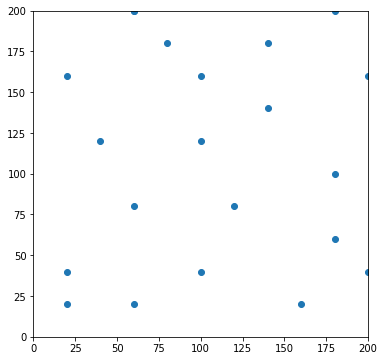

<Figure size 432x288 with 0 Axes>

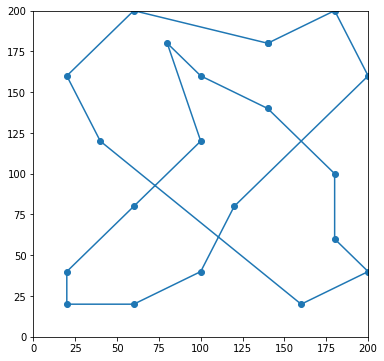

In [5]:
import matplotlib.pyplot as plt
import random
import math
import copy

%matplotlib inline

cities = {0: (60, 200), 1: (180, 200), 2: (80, 180), 3: (140, 180),
          4: (20, 160), 5: (100, 160), 6: (200, 160), 7: (140, 140),
          8: (40, 120), 9: (100, 120), 10: (180, 100), 11: (60, 80),
          12: (120, 80), 13: (180, 60), 14: (20, 40), 15: (100, 40),
          16: (200, 40), 17: (20, 20), 18: (60, 20), 19: (160, 20)}

def plot_tour(tour):
    plt.figure(figsize=(6, 6))
    xy = [cities[i] for i in tour] + [cities[tour[0]]]
    axes = plt.gca()
    axes.set_xlim([0, 200])
    axes.set_ylim([0, 200])
    plt.plot([d[0] for d in xy], [d[1] for d in xy], "-o")
    
def scatter_tour(tour):
    plt.figure(figsize=(6, 6))
    xy = [cities[i] for i in tour] + [cities[tour[0]]]
    axes = plt.gca()
    axes.set_xlim([0, 200])
    axes.set_ylim([0, 200])
    plt.scatter([d[0] for d in xy], [d[1] for d in xy])

scatter_tour(range(20))

def factorial(n):
    retval = 1
    for i in range(1, n + 1):
        retval = retval * i
    return retval

def make_tour():
    ret_list = []
    for i in range(len(cities)):
        city = random.choice(range(len(cities)))
        while city in ret_list:
            city = random.choice(range(len(cities)))
        ret_list.append(city)
    return ret_list

def distance(a, b):
    return math.sqrt((a[0] - b[0]) ** 2 + (a[1] - b[1]) ** 2)

def fitness(tour):
    distances = []
    for i in range(len(tour) - 1):
        dist = distance(cities[tour[i]], cities[tour[i + 1]])
        distances.append(dist)
    distances.append( distance(cities[tour[-1]], cities[tour[0]]))
    #print(distances)
    return sum(distances)

def mutate(tour):
    tour = copy.copy(tour)
    # Pick two points and swap:
    point1 = random.randint(0, len(cities) - 1)
    point2 = random.randint(0, len(cities) - 1)
    tour[point1], tour[point2] = tour[point2], tour[point1]
    return tour

def hillclimb(times):
    guess = make_tour()
    fit_list = [fitness(guess)]

    for i in range(times):
        new_guess = mutate(guess)
        f1 = fitness(guess)
        f2 = fitness(new_guess)
        if f2 < f1:
            fit_list.append(f2)
            guess = new_guess
        else:
            fit_list.append(f1)
    plt.plot(fit_list, marker="o")
    plt.figure()
    plot_tour(guess)
    return guess, fitness(guess)

hillclimb(10000)